In [26]:
import platform
import sys

import pandas as pd
import numpy as np
import tensorflow as tf
import keras
import sklearn


## 今回実行する環境
### テキストとはバージョンが異なる．


In [27]:
print(f"python:      {platform.python_version()} (text: 3.6)")
print(f"sklearn:     {sklearn.__version__}")
print(f"tensorflow:  {tf.__version__} (text: 1.14)")
print(f"keras:       {keras.__version__}")
print(f"numpy:       {np.__version__}")
print(f"pandas:      {pd.__version__}")
RANDOM_SEED = 2018
print(f"random_seed:{RANDOM_SEED}")

python:      3.10.11 (text: 3.6)
sklearn:     1.2.2
tensorflow:  2.13.0-rc0 (text: 1.14)
keras:       2.13.1rc0
numpy:       1.24.3
pandas:      1.5.3
random_seed:2018


In [28]:
# データセットをロードする
data = pd.read_csv('../handson-unsupervised-learning/datasets/credit_card_data/credit_card.csv')

# 今回の分析には用いない'Time'カラムと，正解ラベルである'Class'を除いたデータを`data_x`とする．
data_x = data.copy().drop(['Class', 'Time'], axis=1)

# 正解ラベルはdata_yとする．
data_y = data['Class'].copy()

# 前処理
# data_x をスケール変換するためのクラスをインポート
from sklearn.preprocessing import StandardScaler
# `StandardScaler`は，全ての特徴量の平均を0，標準偏差を1になるようにする．
# これにより，異なる範囲の特徴量を持つデータを正規化する．
scaled_x = pd.DataFrame(StandardScaler().fit_transform(data_x))

In [29]:
data_x.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,...,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619
std,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,...,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109
min,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,...,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000
25%,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,...,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000
50%,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,...,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000
75%,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,...,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000
max,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,...,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000


In [30]:
scaled_x.describe()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05
mean,-1.506872e-17,-9.580116e-18,-8.622104e-17,-5.189230e-18,3.832046e-17,9.979288e-18,1.237432e-17,-3.193372e-18,7.234983e-19,5.588401e-18,...,-1.247411e-18,-3.642440e-18,3.193372e-18,8.781773e-18,9.580116e-18,-5.029561e-17,5.887780e-18,2.444925e-18,-7.908585e-18,2.913952e-17
std,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,...,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00
min,-2.879855e+01,-4.403529e+01,-3.187173e+01,-4.013919e+00,-8.240810e+01,-1.963606e+01,-3.520940e+01,-6.130252e+01,-1.222802e+01,-2.258191e+01,...,-7.069146e+01,-4.741907e+01,-1.506565e+01,-7.175446e+01,-4.683638e+00,-1.975033e+01,-5.401098e+00,-5.590660e+01,-4.674612e+01,-3.532294e-01
25%,-4.698918e-01,-3.624707e-01,-5.872142e-01,-5.993788e-01,-5.010686e-01,-5.766822e-01,-4.478860e-01,-1.746805e-01,-5.853631e-01,-4.917360e-01,...,-2.746334e-01,-3.109433e-01,-7.473476e-01,-2.591784e-01,-5.854676e-01,-6.084001e-01,-6.780717e-01,-1.755053e-01,-1.604440e-01,-3.308401e-01
50%,9.245351e-03,3.965683e-02,1.186124e-01,-1.401724e-02,-3.936682e-02,-2.058046e-01,3.241723e-02,1.871982e-02,-4.681169e-02,-8.533551e-02,...,-8.104705e-02,-4.009429e-02,9.345377e-03,-1.792420e-02,6.765678e-02,3.183240e-02,-1.081217e-01,3.325174e-03,3.406368e-02,-2.652715e-01
75%,6.716939e-01,4.867202e-01,6.774569e-01,5.250082e-01,4.433465e-01,2.991625e-01,4.611107e-01,2.740785e-01,5.435305e-01,4.168842e-01,...,1.725733e-01,2.537392e-01,7.283360e-01,2.364319e-01,7.257153e-01,6.728006e-01,4.996663e-01,2.255648e-01,2.371526e-01,-4.471707e-02
max,1.253351e+00,1.335775e+01,6.187993e+00,1.191874e+01,2.521413e+01,5.502015e+01,9.747824e+01,1.675153e+01,1.419494e+01,2.180758e+01,...,5.113464e+01,3.703471e+01,1.447304e+01,3.607668e+01,7.569684e+00,1.442532e+01,7.293975e+00,7.831940e+01,1.025434e+02,1.023622e+02


In [31]:
# データの3分の2を訓練セット，残りをテストセットとする．
# データ分割用の関数をインポートする．
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = \
    train_test_split(scaled_x, data_y,
                     test_size=0.33,
                     random_state=RANDOM_SEED,
                     stratify=data_y) # データの分布が等しくなるように分割する

x_train_ae: pd.DataFrame = x_train[y_train==0]
x_test_ae: pd.DataFrame = x_test.copy()
print(list(map(len, [x_train, x_test, y_train, y_test])))

[190820, 93987, 190820, 93987]


In [32]:
def anomaly_scores(original_df: pd.DataFrame, reduced_df: pd.DataFrame) -> np.ndarray:
    """
    元の特徴量行列と，新たに再構成された特徴量行列の間の再構成誤差を計算する．
    2乗誤差を計算し，正規化して0〜1に納める．
    0に近いほど正常，１に近いほど異常
    """
    loss: np.ndarray = np.sum((np.array(original_df) - np.array(reduced_df))**2, axis=1)
    loss: pd.Series = pd.Series(loss, index=original_df.index)
    loss: np.ndarray = (loss - np.min(loss)) / (np.max(loss) - np.min(loss))
    return loss


In [33]:
from sklearn.metrics import precision_recall_curve, average_precision_score, roc_curve, auc
import matplotlib.pyplot as plt

def plot_results(true_labels, anomaly_scores_, return_preds = False):
    preds = pd.concat([true_labels, anomaly_scores_], axis=1)
    preds.columns = ['true_label', 'anomaly_score']
    precision, recall, thresholds = \
    precision_recall_curve(preds['true_label'], preds['anomaly_score'])
    average_precision = average_precision_score(
        preds['true_label'], preds['anomaly_score']
    )
    plt.step(recall, precision, color='k', alpha=0.7, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

    plt.xlabel('Recall')
    plt.ylabel('Precision')


    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])

    plt.title('Precision-Recall curve: Average Precision = '
              '{0:0.2f}'.format(average_precision))

    fpr, tpr, thresholds =\
        roc_curve(preds['true_label'], preds['anomaly_score'])

    area_under_roc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
    plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.xlabel([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic: Area under the curve = {0:0.2f}'.format(area_under_roc))
    plt.legend(loc='lower right')
    plt.show()

    if return_preds:
        return preds, average_precision

In [34]:
from keras.src.layers import Dense
from keras import Sequential

# 8.4 最初のオートエンコーダ

# SequentialモデルAPIは，複数の層を追加してコンパイルすることで，ニューラルネットワークを構築することができる．
model = Sequential()
# Encoder
model.add(Dense(units=29,  # 中間層の次元数
                activation='linear', # 活性化関数
                input_dim=29 # 入力層の次元数
                ))
# Decoder
model.add(Dense(
    units=29,
    activation='linear'
))


model.compile(
    optimizer='adam', # 最適化アルゴリズム -> Adam
    loss='mean_squared_error', # 誤差関数 -> 平均二乗誤差
    metrics=['accuracy'] # 評価指標を指定する．(正解率`accuracy`の他にも，精度`precision`，再現率`recall`，F1スコア`F1score`などがある)
)
"""
accuracyについて
予測データのうち，出力の最大値が正解ラベルと一致しているものの割合
"""
NUM_EPOCHS = 10
BATCH_SIZE = 1
history = model.fit(
    x=x_train_ae,
    y=x_train_ae,
    epochs=NUM_EPOCHS, # データセットを使って学習する回数
    batch_size=BATCH_SIZE,
    shuffle=True, # データをシャッフルすることで，．
    validation_data=(x_train_ae, x_train_ae), # 評価用データ（検証データ）の指定
    verbose=1,
    use_multiprocessing=True) # ログを出力するか否か


Epoch 1/10
190490/190490 [==============================] - 112s 585us/step - loss: 0.0148 - accuracy: 0.9613 - val_loss: 0.0250 - val_accuracy: 0.9368
Epoch 2/10
190490/190490 [==============================] - 114s 596us/step - loss: 0.0060 - accuracy: 0.9708 - val_loss: 6.6099e-04 - val_accuracy: 0.9910
Epoch 3/10
190490/190490 [==============================] - 109s 574us/step - loss: 0.0058 - accuracy: 0.9726 - val_loss: 0.0019 - val_accuracy: 0.9809
Epoch 4/10
190490/190490 [==============================] - 110s 580us/step - loss: 0.0060 - accuracy: 0.9719 - val_loss: 0.0062 - val_accuracy: 0.9574
Epoch 5/10
190490/190490 [==============================] - 109s 573us/step - loss: 0.0063 - accuracy: 0.9711 - val_loss: 0.0057 - val_accuracy: 0.9664
Epoch 6/10
190490/190490 [==============================] - 109s 571us/step - loss: 0.0059 - accuracy: 0.9721 - val_loss: 0.0044 - val_accuracy: 0.9613
Epoch 7/10
190490/190490 [==============================] - 109s 574us/step - loss: 

2938/2938 [==============================] - 1s 229us/step


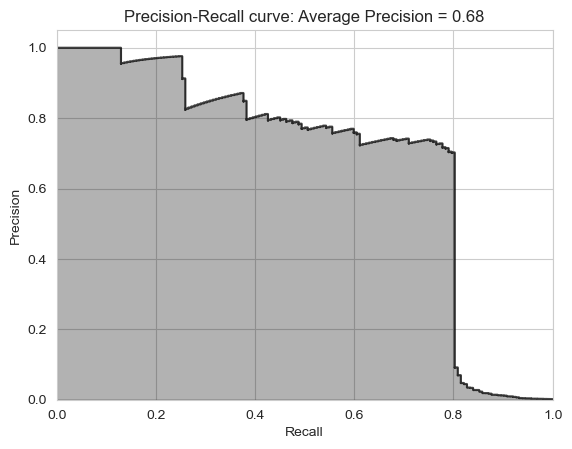

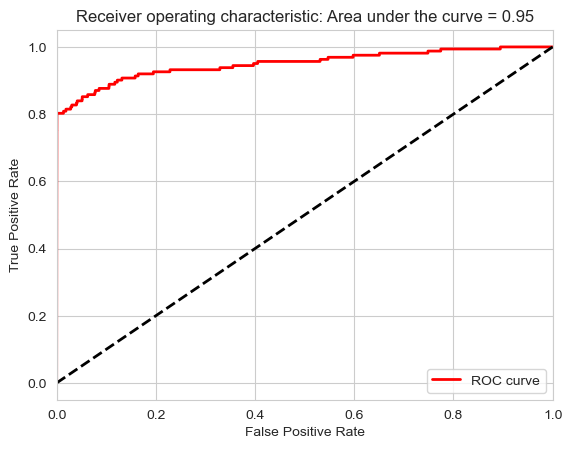

In [35]:
# テストセットを用いた評価
predictions = model.predict(x_test, verbose=1)
anomaly_scores_ae = anomaly_scores(x_test, predictions)
plot_results(y_test, anomaly_scores_ae)

### 平均適合率　→　0.34, 0.14, 0.53, 0.02, 0,72...
### **毎回大きく異なる**
### -> 正解ラベルの数が極端に少ないデータのため，予測が1つ当たるかどうかで適合率が大きく変化する？

In [ ]:
# Repeat the same auto encoder for 10 times.
# Define the auto encoder as a function
def simple_auto_encoder(model_: Sequential):
    # Call neural network API
    # Compile the model
    model_.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

    # Train the model
    history_ = model_.fit(x=x_train_ae, y=x_train_ae, epochs=NUM_EPOCHS, batch_size=BATCH_SIZE, shuffle=True, validation_data=(x_train_ae, x_train_ae), verbose=1)

    # Evaluate on test set
    predictions_ = model_.predict(x_test, verbose=1)
    anomaly_scores_ae_ = anomaly_scores(x_test, predictions_)
    average_precision = average_precision_score(y_test, anomaly_scores_ae_)
    return average_precision

test_scores = []
for _ in range(10):
    model = Sequential(
        [Dense(units=29, activation='linear', input_dim=29),
         Dense(units=29, activation='linear')]
    )
    avg_precision = simple_auto_encoder(model)
    test_scores.append(avg_precision)

Epoch 1/10
190490/190490 [==============================] - 108s 568us/step - loss: 0.0188 - accuracy: 0.9585 - val_loss: 0.0021 - val_accuracy: 0.9885
Epoch 2/10
190490/190490 [==============================] - 109s 574us/step - loss: 0.0060 - accuracy: 0.9720 - val_loss: 0.0226 - val_accuracy: 0.9301
Epoch 3/10
190490/190490 [==============================] - 108s 568us/step - loss: 0.0060 - accuracy: 0.9715 - val_loss: 0.0186 - val_accuracy: 0.9527
Epoch 4/10
190490/190490 [==============================] - 108s 569us/step - loss: 0.0060 - accuracy: 0.9709 - val_loss: 0.0032 - val_accuracy: 0.9915
Epoch 5/10
190490/190490 [==============================] - 108s 569us/step - loss: 0.0061 - accuracy: 0.9703 - val_loss: 6.0119e-04 - val_accuracy: 0.9940
Epoch 6/10
190490/190490 [==============================] - 109s 570us/step - loss: 0.0065 - accuracy: 0.9711 - val_loss: 0.0014 - val_accuracy: 0.9834
Epoch 7/10
190490/190490 [==============================] - 108s 569us/step - loss: 

In [ ]:
print(test_scores)
print(f"Mean average prediction over 10 runs: {np.mean(test_scores)}")
print(f"Coefficient of variation over 10 runs: {np.std(test_scores) / np.mean(test_scores)}")

# 8.5 線形活性化関数を用いた2層未完備オートエンコーダ
## 隠れ層の次元数を29-> **20**


In [ ]:
test_scores = []
for _ in range(10):
    model = Sequential(
        [Dense(units=20, activation='linear', input_dim=29),
         Dense(units=29, activation='linear')]
    )
    avg_precision = simple_auto_encoder(model)
    test_scores.append(avg_precision)

In [ ]:
print(test_scores)
print(f"Mean average prediction over 10 runs: {np.mean(test_scores)}")
print(f"Coefficient of variation over 10 runs: {np.std(test_scores) / np.mean(test_scores)}")

# 8.5.1 線形活性化関数を用いた2層未完備オートエンコーダの層を増やす
## 隠れ層を1層増やす．
## 隠れ層の次元数を29 -> **28** -> **27** -> **29**

In [ ]:
test_scores = []
for _ in range(10):
    model = Sequential(
        [Dense(units=28, activation='linear', input_dim=29),
         Dense(units=27, activation='linear'),
         Dense(units=29, activation='linear'),
         ]
    )
    avg_precision = simple_auto_encoder(model)
    test_scores.append(avg_precision)
print(test_scores)
print(f"Mean average prediction over 10 runs: {np.mean(test_scores)}")
print(f"Coefficient of variation over 10 runs: {np.std(test_scores) / np.mean(test_scores)}")

# 8.6 非線形オートエンコーダ
## 活性化関数 linear -> leru
## 隠れ層の次元数を29 -> **27** -> **22** ->　**27** -> **29**

In [ ]:
test_scores = []
ACTIVATION = 'relu'
for _ in range(10):
    model = Sequential(
        [Dense(units=27, activation=ACTIVATION, input_dim=29),
         Dense(units=22, activation=ACTIVATION),
         Dense(units=27, activation=ACTIVATION),
         Dense(units=29, activation=ACTIVATION),
         ]
    )
    avg_precision = simple_auto_encoder(model)
    test_scores.append(avg_precision)

In [ ]:
print(test_scores)
print(f"Mean average prediction over 10 runs: {np.mean(test_scores)}")
print(f"Coefficient of variation over 10 runs: {np.std(test_scores) / np.mean(test_scores)}")

# 8.7 線形活性化関数を用いた過完備オートエンコーダ

In [ ]:
test_scores = []
ACTIVATION = 'linear'
for _ in range(10):
    model = Sequential(
        [Dense(units=40, activation=ACTIVATION, input_dim=29),
         Dense(units=29, activation=ACTIVATION),
         ]
    )
    avg_precision = simple_auto_encoder(model)
    test_scores.append(avg_precision)

In [ ]:
print(test_scores)
print(f"Mean average prediction over 10 runs: {np.mean(test_scores)}")
print(f"Coefficient of variation over 10 runs: {np.std(test_scores) / np.mean(test_scores)}")

# 8.8 線形活性化関数を用いドロップアウトを適用した過完備オートエンコーダ

In [ ]:
from keras.src.layers import Dropout

test_scores = []
ACTIVATION = 'linear'
for _ in range(10):
    model = Sequential(
        [Dense(units=40, activation=ACTIVATION, input_dim=29),
         Dropout(0.10),
         Dense(units=29, activation=ACTIVATION),
         ]
    )
    avg_precision = simple_auto_encoder(model)
    test_scores.append(avg_precision)

In [ ]:
print(test_scores)
print(f"Mean average prediction over 10 runs: {np.mean(test_scores)}")
print(f"Coefficient of variation over 10 runs: {np.std(test_scores) / np.mean(test_scores)}")

In [ ]:
from keras.src import regularizers

# 8.9

test_scores = []
ACTIVATION = 'linear'
for _ in range(10):
    model = Sequential(
        [Dense(units=40, activation=ACTIVATION, activity_regularizer=regularizers.l1(10e-5),input_dim=29),
         Dropout(0.10),
         Dense(units=29, activation=ACTIVATION),
         ]
    )
    avg_precision = simple_auto_encoder(model)
    test_scores.append(avg_precision)

In [ ]:
print(test_scores)
print(f"Mean average prediction over 10 runs: {np.mean(test_scores)}")
print(f"Coefficient of variation over 10 runs: {np.std(test_scores) / np.mean(test_scores)}")